In [49]:
import pandas as pd
import networkx as nx
import numpy as np
from datetime import datetime
import pickle 

comments_file = "../data/Comments.pkl"
comments = pd.read_pickle(comments_file)

posts_file = "../data/Posts.pkl"
posts = pd.read_pickle(posts_file)

In [50]:
comments.tail()
posts.tail()

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
1755566,NaN,NaN,<p>From your question I read the table definit...,NaN,0,NaN,2015-12-14T11:38:43.200,NaN,34558009,2015-12-14T11:38:43.200,...,NaN,NaN,Michael Green,2234058,34558008,2,2,NaN,NaN,NaN
1755567,34695622,2,<p>I am writing a worker that uses amqplib's C...,NaN,1,NaN,2015-12-31T16:12:36.310,1,34615091,2016-01-10T19:39:35.700,...,NaN,NaN,springloaded,2774883,NaN,1,3,<node.js><rabbitmq>,How to work around amqplib's Channel#consume o...,940
1755568,NaN,2,"<p>Hi,</p>\n\n<p>I am running an application t...",NaN,0,NaN,2015-12-29T03:48:49.167,NaN,34824513,2016-01-16T07:10:59.443,...,NaN,NaN,Nuker,NaN,NaN,1,-3,<java><out-of-memory>,Java out of memory error on CentOS,802
1755569,NaN,NaN,<p>You need to give your application more heap...,NaN,12,NaN,2015-12-29T03:50:22.040,NaN,34824514,2015-12-29T03:50:22.040,...,NaN,NaN,EEAA,176594,34824513,2,2,NaN,NaN,NaN
1755570,NaN,NaN,"<p>If you run an application via init script, ...",NaN,3,NaN,2015-12-29T04:08:01.440,NaN,34824515,2015-12-29T04:08:01.440,...,NaN,NaN,cuongnv23,5627244,34824513,2,0,NaN,NaN,NaN


In [61]:
post_ids = set(posts['Id'])
comment_ids = set(comments['PostId'])

not_found = 0
for elem in comment_ids:
    if elem not in post_ids:
        not_found += 1

print("Not found ", not_found)
print("Whole ", len(comment_ids))


Not found  181549
Whole  1097766


In [62]:
# Construct post - poster id dictionary 
index_dict = {}
for index, row in posts.iterrows():
    index_dict[row['Id']] = row['OwnerUserId']

In [67]:
# Construct a network

G=nx.Graph()

edge_count = 0
not_found = 0
for index, row in comments.iterrows():
    # Set some kind of limit for computation 
    if not_found + edge_count > 10000:
        break
    post_id = row['PostId']
    commenter_id = row['UserId']
    #poster_id_df = posts.loc[posts['Id'] == post_id]
    if post_id in index_dict:
        #poster_id = poster_id_df.iloc[0]['OwnerUserId']
        G.add_edge(commenter_id, index_dict[post_id])
        edge_count += 1
    else:
        not_found += 1

In [68]:
print(edge_count)

6577


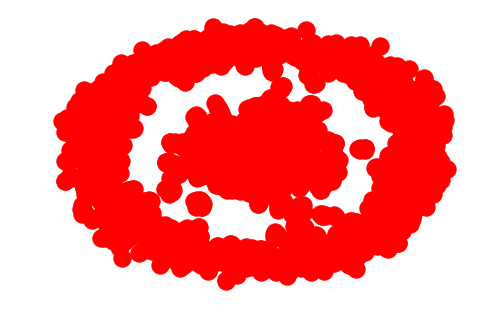

In [69]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()